# Interplation

You will learn simple function approximation using linear interpolation (**scipy.interp**).

**Table of contents**<a id='toc0_'></a>    
- 1. [Linear interpolation algorithm](#toc1_)    
- 2. [Example](#toc2_)    
- 3. [Summary](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 1. <a id='toc1_'></a>[Linear interpolation algorithm](#toc0_)

**Problem:** 

1. We consider a function $f(x)$ where $x\in\mathbb{R}$. 
1. We know the function values for some set $X$. 
1. We now want to approximate $f(x)$ for an $x \notin X$ *without* evaluating $f(x)$, e.g. because this takes time.

Our **notation** is:

1. Grid points: $X = \{x_0,x_1,\dots,x_{n-1}\}$ where $x_0 < x_1 < \dots x_{n-1}$.
2. Function values: $F = \{ f_0,f_1,\dots,f_{n-1} \}$ where $f_i = f(x_i)$.

**Algorithm:** `linear_interpolate()`
1. Determine `i`  such that

$$
x_i \leq x < x_{i+1}
$$

2. Compute interpolated value by

$$
y =  f_{i} + \frac{f_{i+1}-f_{i}}{x_{i+1}-x_{i}}(x-x_{i})
$$

**Extrapolation:**

1. Below where $x < x_1$, use $i = 0$

$$
y =  f_{0} + \frac{f_{1}-f_{0}}{x_{1}-x_{0}}(x-x_{0})
$$

2. Above where $x > x_{n-2}$, use $i = n-2$

$$
y =  f_{n-2} + \frac{f_{n-1}-f_{n-2}}{x_{n-1}-x_{n-2}}(x-x_{n-2})
$$

In [2]:
def linear_interpolate(X,F,x):
    """ linear interpolation (and extrapolation)
    
    Args:
    
        X (np.ndarray): known points
        F (np.ndarray): known values
        x (float): point to be interpolated
        
    Returns:
    
        y (float): intepolated value
    
    """
    
    assert len(X) == len(F)
    assert np.all(np.diff(X) > 0), "X must be sorted in ascending order"
    
    n = len(X)
    
    # a. find index in known points
    if x < X[1]: # exprapolation below
    
        i = 0
    
    elif x > X[-2]: # extrapolation above
        
        i = n-2

    else: # true interpolation
        
        # search
        i = 0 
        while x >= X[i+1] and i < n-1:
            i += 1
        
        # check
        assert x >= X[i]
        assert x < X[i+1]

    # b. interpolate
    diff_X = X[i+1]-X[i]
    diff_F = F[i+1]-F[i]
    slope = diff_F/diff_X
    y = F[i] + slope*(x-X[i])
    
    return y

## 2. <a id='toc2_'></a>[Example](#toc0_)

Consider the following function and known points:

In [3]:
f = lambda x: (x-3)**3 - 3*x**2 + 5*x

X = np.linspace(-5,10,6)
F = f(X)

True function values at fine grid:

In [4]:
X_true = np.linspace(-7,12,500) # 500 makes it "fine"
F_true = f(X_true)

Simple test:

x = -2.3 -> true = -176.2, interpolated = -193.5
x =  4.1 -> true =  -28.6, interpolated =  -27.7
x =  7.5 -> true =  -40.1, interpolated =  -24.5
x =  9.1 -> true =   24.1, interpolated =   50.7


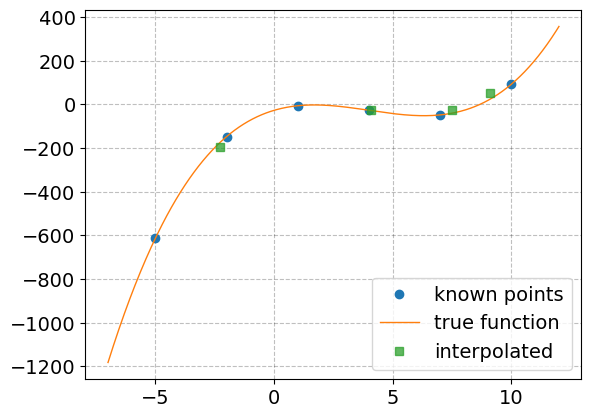

In [5]:
# interpolate
X_approx = [-2.3,4.1,7.5,9.1]
F_approx = []
for x in X_approx:
    true = f(x)
    y = linear_interpolate(X,F,x)
    F_approx.append(y)
    print(f'x = {x:4.1f} -> true = {true:6.1f}, interpolated = {y:6.1f}')

# plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X,F,'o',label='known points')
ax.plot(X_true,F_true,'-',lw=1,label='true function')
ax.plot(X_approx,F_approx,'s',lw=1,label='interpolated',alpha=0.75)
ax.legend(loc='lower right',facecolor='white',frameon=True);    

**Scipy.interpolate:** Use the *RegularGridInterpolator*  

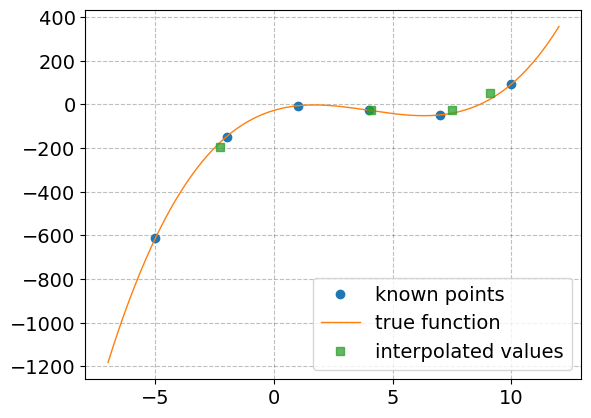

In [6]:
# a. construct interpolation function
interp_func = interpolate.RegularGridInterpolator([X],F,
                                                  bounds_error=False,
                                                  fill_value=None)

# bounds_error=False and fill_value=None allow for extrapolation

# b. interpolate
F_approx_sp = interp_func(X_approx)

# c. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X,F,'o',label='known points')
ax.plot(X_true,F_true,'-',lw=1,label='true function')
ax.plot(X_approx,F_approx_sp,'s',lw=1,label='interpolated values',alpha=0.75)
ax.legend(loc='lower right',facecolor='white',frameon=True);

**Task:** Increase the number of *known* points in the cell below and see what happens.

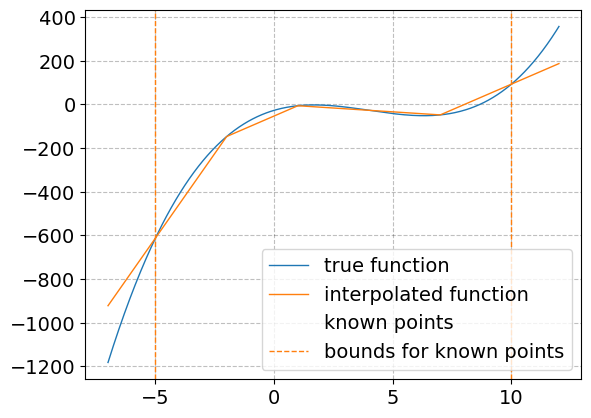

In [7]:
# a. known
X_ = np.linspace(-5,10,6)
F_ = f(X_)

# b. interpolation
interp_func = interpolate.RegularGridInterpolator([X_],F_,
                                                  bounds_error=False,
                                                  fill_value=None)

F_approx_sp = interp_func(X_true)

# c. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(X_true,F_true,'-',lw=1,label='true function')
ax.plot(X_true,F_approx_sp,'-',lw=1,label='interpolated function')
ax.scatter(X_,F_,color=colors[1],s=0/X_.size,zorder=5,label='known points')

ax.axvline(X_[0],color=colors[1],ls='--',lw=1,label='bounds for known points') # smallest known point
ax.axvline(X_[-1],color=colors[1],ls='--',lw=1) # largest known point

ax.legend(loc='lower right',facecolor='white',frameon=True);

**Note:**

1. Linear interpolation works best when the function does not curve too much.
2. *Extrapolation* is much worse than *interpolation*.

## 3. <a id='toc3_'></a>[Summary](#toc0_)

**Multiple dimensions:** Same principle, ``interpolate.RegularGridInterpolator([X1,X2,X3],F)``.

**Longer name:** *Piecewise linear interpolation*.

* Pro: Simple to implement and very flexible.
* Con: Not smooth. Can not handle unordered multiple dimensional known values.

**Many other types of interpolators:**

1. Nearest neighbor
1. Splines
1. Polynomials
1. Kernel-based 
1. Neural networks